<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-computational-methods" data-toc-modified-id="Introduction-to-computational-methods-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to computational methods</a></span><ul class="toc-item"><li><span><a href="#Data-file" data-toc-modified-id="Data-file-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data file</a></span></li><li><span><a href="#Algorithm" data-toc-modified-id="Algorithm-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Algorithm</a></span></li><li><span><a href="#Python-code" data-toc-modified-id="Python-code-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Python code</a></span></li><li><span><a href="#Python-modules/libraries" data-toc-modified-id="Python-modules/libraries-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Python modules/libraries</a></span></li><li><span><a href="#convert-flow-to-a-numpy-array" data-toc-modified-id="convert-flow-to-a-numpy-array-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>convert flow to a numpy array</a></span></li></ul></li></ul></div>

# Introduction to computational methods

This notebook introduces a python program to integrate daily average flow into and out of
the tailings management facility (TMF), and the volume of water in the TMF through time.

## Data file
This notebook assumes that a comma-separated variable (csv) file named `data/july2016-tmf-flow.csv`
exists in the data folder in the current working directory. The file contains three columns with headers:

`date` `outflow` `inflow`

The first 4 lines of the file are:

`date,outflow,inflow
2016-07-01,0.0703,0.1181
2016-07-02,0.066,0.1121
2016-07-03,0.0621,0.1079`

The data in the csv file is in the following format

`date` is in `yyyy-mm-dd`

`outflow` is the daily average outflow in $m^3/s$

`inflow` is the daily average inflow in $m^3/s$



## Algorithm
The volume of water in the TMF on day $t$ of the computation is $V(t)$, the daily average outflow is $Q_{out}$
and the daily average inflow is $Q_{out}$

The basic computational algorithm is:

1. Read in the date, $Q_{out}$ and $Q_{out}$ data from the file `july2016-tmf-flow.csv`.
2. Compute the change in volume over the day $\Delta V = (Q_{in} - Q_{out})\Delta t$
3. Update the volume of the TMF: $V(t+\Delta t) = V(t) + \Delta V$
4. Loop through all dates in the file until complete.

## Python code
We'll introduce python concepts as we go in the course, so we don't expect you to fully understand
this code yet. We'll therefore only provide a cursory explanation here.


## Python modules/libraries
It is good practice to import libaries at the beginning of a program. Libaries are collections of python code.


In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The `import` command tells python to import the library. The `as` specifies a user - chosen nickname for library
to be used in this program. So for this program, the `numpy` library will also be known as `np`.

We are importing four libraries or library sections:

`numpy` is a library with numerical - related codes. We'll use it alot in the course.

`pandas` is a libary with codes to manipulate tabular data, that is data organized in rows and columns.

`matplotlib` is a vast library for plotting. We don't need the whole library, but only two subsections.

`matplotlib.pyplot`, nicknamed `plt` is a subsection containing so-called handle graphics. We'll use it alot.

`matplotlib.dates`,  which we nickname `mdates` is a specialty subsection containing code for manipulating date formats.


In [2]:
# use pandas to read in csv data
data_file = "data/july2016-tmf-flow.csv"
df_flow = pd.read_csv(data_file)
df_flow.head()

date  outflow  inflow
0  2016-07-01   0.0703  0.1181
1  2016-07-02   0.0660  0.1121
2  2016-07-03   0.0621  0.1079
3  2016-07-04   0.0599  0.1115
4  2016-07-05   0.0574  0.1108

The `pd.read_csv` command from the `pandas` library reads all the rows and columns from the file `july2016-tmf-flow.csv`.

We could have also written the command as `pandas.read.csv`, but we used our nickname `pd` to save some typing.

Here we see the power of the pandas library. This command contains code to open the file, read in each line of data from the
csv file,and then stores that data in a `dataframe` that we named `flow`. You can think of a `dataframe` as rows and
columns of data. In our case, the data in the `dataframe` is dates, outflows and inflows.

## convert flow to a numpy array

In [3]:
flow = df_flow.values

# find number of days of data (number of rows in array)

n = flow.shape[0]
print(f"Number of days in file: {n}")
flow[:4, :]

Number of days in file: 31


array([['2016-07-01', 0.0703, 0.1181],
       ['2016-07-02', 0.066, 0.1121],
       ['2016-07-03', 0.0621, 0.1079],
       ['2016-07-04', 0.0599, 0.1115]], dtype=object)

This line of code uses the `.shape` method, which returns the dimension (number of rows and columns) in the dataframe
`flow`. `.shape[0]` is the number of rows, or in our case, the number of days of outflow and inflow data in the dataframe,
which we assign to the variable `n`.



In [4]:
# allocate np arrays for time and volume for calculations -
# doing this in advance makes python run faster

v = np.zeros(n, float)

The function `zeros` from the numpy library creates an array of zeros. Python runs faster if the arrays used for computation
are defined in advance, versus on the fly. Here we create an array `v` of `n` zeros of type `float`. Each element in
`v` will store the volume of water in the TMF on a specific day.

In [5]:
# print  the columns in the dataframe
print(f"Columns in csv file: {df_flow.columns}")

# convert column called date to pandas date format
# and store in column called yearmonthday

df_flow["yearmonthday"] = pd.to_datetime(df_flow["date"])

# see the data in the column yearmonthday
print(f"type of the timestap object: {type(df_flow['yearmonthday'][0])}")

Columns in csv file: Index(['date', 'outflow', 'inflow'], dtype='object')
type of the timestap object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


We first print the names of the columns in the dataframe that were read in from the `csv` file.
We do this using the `.columns` method on the `flow` dataframe; that is `flow.columns` returns the indices of
the columns in the dataframe.

The command `flow["yearmonthday"] = pd.to_datetime(flow["date"]` uses the pandas method `.to_datetime`
to convert the data in the column indexed with `date` in the dataframe `flow` to a date format that pandas
understands, and then stores those panda dates in the dataframe `flow` in a new column with index `yearmonthday`.

We then print out the type of the data in the column `yearmonthday` to prove that it is now a date.

In [6]:
# set volume in TMF at time zero to 8.1 x 10^6 m^3

v[0] = 8.1e6

"""
loop through and compute volume through time
since flow is in m^3/s, and flows are daily average flows, must convert
to m^3 in a day by multiplying by 86400 s/d
"""
seconds_per_day = 86400.0
inflow = flow[:, 1]
outflow = flow[:, 2]
for i in range(n - 1):
    v[i + 1] = v[i] + (inflow[i] - outflow[i]) * seconds_per_day

df_flow["volume"] = v

This is the guts of the computation. We first set the volume in the TMF at time zero to $8.1\times 10^6 m^3$.

Then we loop through the days in the dataframe and compute the change in volume over each day as described above:
$V(t+\Delta t) = V(t) + (Q_{in} - Q_{out})\Delta t$, where $\Delta t$ is $86400$ seconds (one day).

In python we use a `for` loop. The command `for i in range(n - 1):` sets `i` to `0`, then enters the loop and when finished the loop,
sets `i` to `1`, enters the loop,..., `n-1`.
On the last time through the loop, `i=n-1` so that when we compute`v[i+1]` for the last time, we are computing `v[n]`.

The rest of the code is used to generate the plot of outflow and inflow over time in on subplot,
and volume of water in the TMF over time in another subplot.

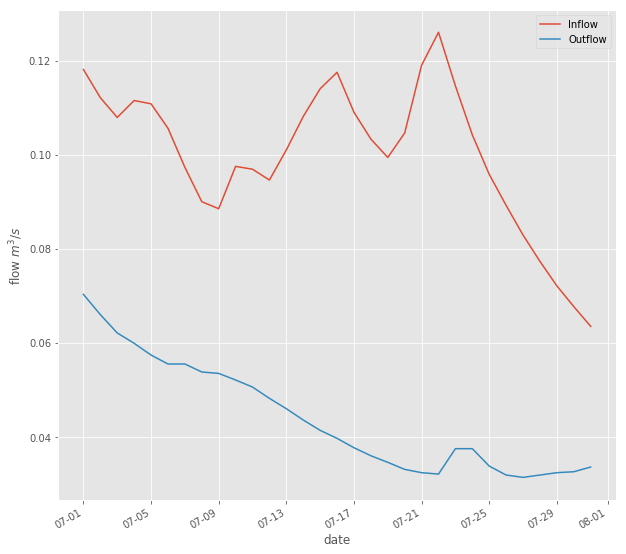

In [7]:
# make some plots

# format for the x axis label to be month - day eg 07-03 for July 3
# format string for dates that will be plotted on the x axis

myFmt = mdates.DateFormatter("%m-%d")

# in the plot ax, plot outflow and inflow as separate lines

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [10, 10]
plt.plot(df_flow["yearmonthday"], df_flow["inflow"], label="Inflow")
plt.plot(df_flow["yearmonthday"], df_flow["outflow"], label="Outflow")
plt.legend()
ax = plt.gca()
fig = plt.gcf()
ax.set(ylabel="flow $m^3/s$", xlabel="date")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()

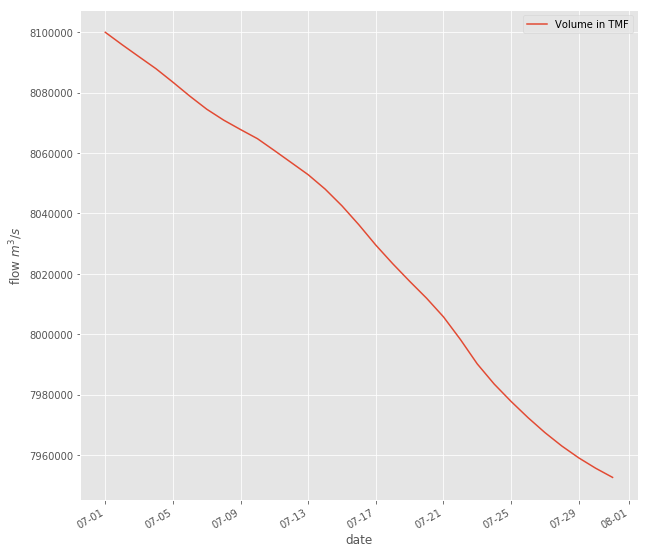

In [8]:
# # in second plot, plot the volume in TMF in m^3, which is stored in the "volume" column
plt.plot(df_flow["yearmonthday"], df_flow["volume"], label="Volume in TMF")
plt.legend()
ax = plt.gca()
fig = plt.gcf()
ax.set(ylabel="flow $m^3/s$", xlabel="date")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()